<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4 and 5)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[Decision tree](#dtree)**


**Import the required libraries**

In [226]:
# type your code here# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split,cross_val_score

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import classification_report, recall_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

# import function to perform feature selection
from sklearn.feature_selection import RFE

#### Load the csv file

In [107]:
# type your code here
df = pd.read_csv('emp_attrition.csv')
df.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14


In [5]:
df.shape

(1580, 18)

In [7]:
df.isnull().sum().sum()

0

### Let's begin with some hands-on practice exercises

<a id="dtree"> </a>
## 1. Decision tree

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Write a code to detect the outliers in the dataset. Remove the outliers using IQR method, if present.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# type your code here

In [103]:
df.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,1,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,1,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14


In [104]:
df.shape

(1580, 18)

In [108]:
cat = df.select_dtypes(exclude = np.number)
num = df.select_dtypes(include = np.number)


(1580, 11)

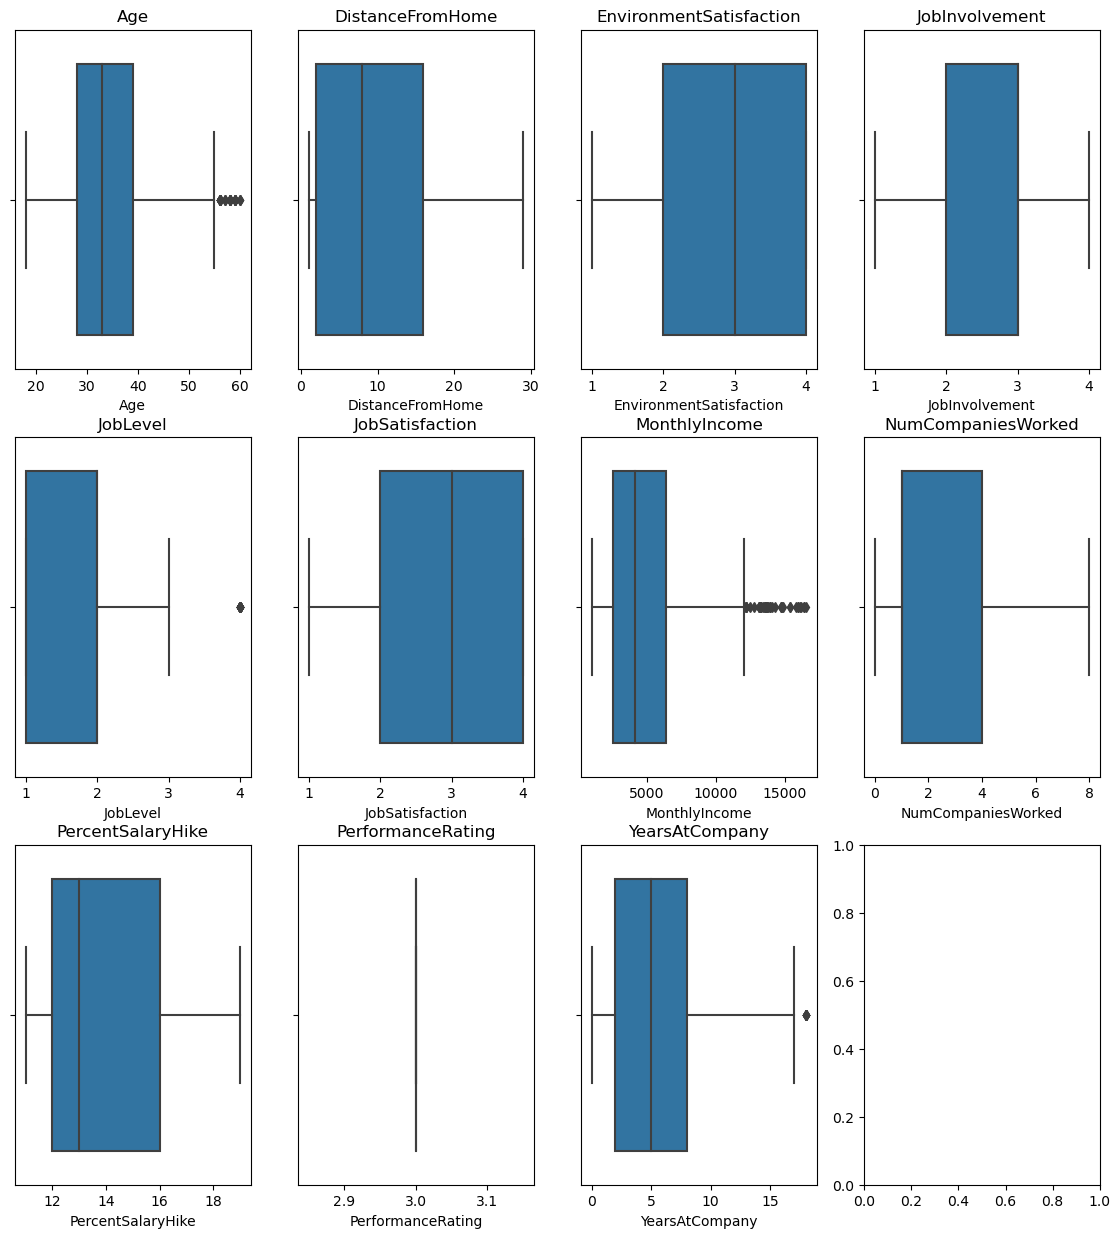

In [119]:
fig,axes = plt.subplots(3,4,figsize = (14,15))

for i,cols in enumerate(num.columns):
    sns.boxplot(x = df[cols], ax = axes[i//4,i%4])
    axes[i // 4, i % 4].set_title(cols)
plt.show()

In [133]:
# Assuming you have a DataFrame 'df' containing your data

# Define a function to apply capping to a column
def cap_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column[column < lower_bound] = lower_bound
    column[column > upper_bound] = upper_bound
    return column

# Select only numerical columns for outlier treatment
num = df.select_dtypes(include=[np.number])

# Apply the cap_outliers function to each numerical column
df[num.columns] = num.apply(cap_outliers)

# Now, 'df' contains your data with outliers capped for all numerical columns


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a model to predict whether or not an employee will leave the company based on employee's environment satisfaction and monthly income. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [136]:
df['Attrition'] = df['Attrition'].apply(lambda x : 1 if x == 'Yes' else 0)

In [183]:
cat = df.select_dtypes(exclude = np.number)
num = df.select_dtypes(include = np.number)

dmy = pd.get_dummies(cat, drop_first=True)
final = pd.concat([dmy,num],axis = 1)
x = final.drop('Attrition',axis = 1)
y = df['Attrition']
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=3)
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)
ytest_pred = model.predict(X_test)
accuracy_score(y_test, ytest_pred)

0.879746835443038

In [184]:
# 0.8818565400843882 wihtout outlier traatment

In [168]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Build a full model to predict if an employee will leave the company. Find three features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [169]:
# type your code here

In [191]:
model3 = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=5)
model3.fit(X_train, y_train)
ytest_pred = model3.predict(X_test)
accuracy_score(y_test, ytest_pred)

0.7552742616033755

In [171]:
important_feature = pd.DataFrame({
    'features':X_test.columns,
    'values':model.feature_importances_
})
important_feature.sort_values('values',ascending = False).head(3)

,features,values
25,MonthlyIncome,0.169214
19,Age,0.126777
20,DistanceFromHome,0.122447


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4.  Find the area under the receiver operating characteristic curve for full model built in question 3. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [172]:
# type your code here

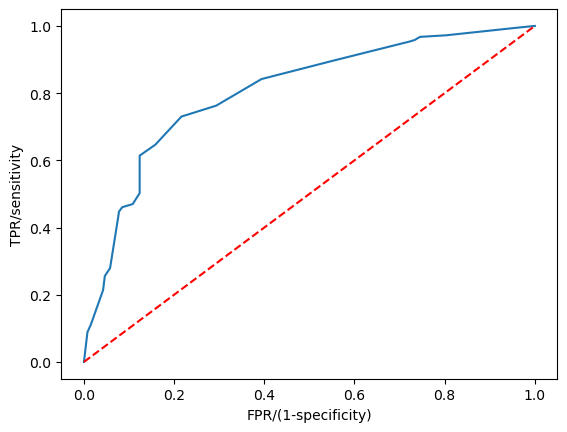

In [181]:
y_pred_prob = model3.predict_proba(X_test)

fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])

plt.plot(fpr,tpr)
plt.xlabel('FPR/(1-specificity)')
plt.ylabel('TPR/sensitivity')
plt.plot([0,1],[0,1],'r--')
plt.show()

In [182]:
fpr

array([0.        , 0.00772201, 0.01544402, 0.04247104, 0.04633205,
       0.05791506, 0.07722008, 0.07722008, 0.08494208, 0.10810811,
       0.12355212, 0.12355212, 0.12355212, 0.12355212, 0.15830116,
       0.21621622, 0.29343629, 0.39382239, 0.55598456, 0.72200772,
       0.73359073, 0.74517375, 0.8030888 , 0.96525097, 1.        ])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Plot a confusion matrix for the full model built in Q3.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [190]:
# type your code here

In [194]:
cm = confusion_matrix(y_test,ytest_pred)

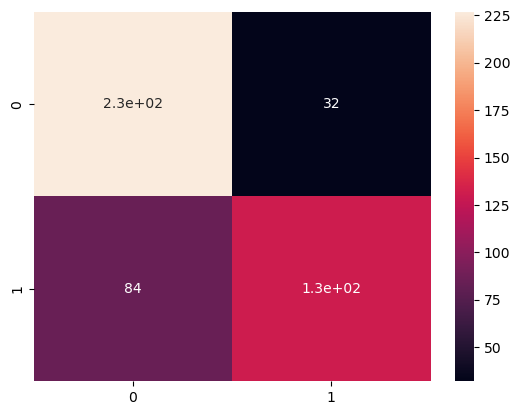

In [196]:
sns.heatmap(cm,annot = True)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Calculate the specificity, sensitivity, % of misclassified and correctly classified observations. What can you say about the model by looking at the sensitivity and specificity values? Is this a good model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [193]:
# type your code here

In [211]:
cm.T

array([[227,  84],
       [ 32, 131]], dtype=int64)

In [205]:
specificity = cm[0][0]/(cm[0][0] + cm[0][1])
sensitivity = cm[1][1]/(cm[1][0]+cm[1][1])

In [206]:
sensitivity

0.6093023255813953

In [212]:
#we can say that out of all the actual false, 60% are actually true

In [213]:
specificity

0.8764478764478765

In [214]:
#we can say that out of all the actual true, 87% are actually true

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build and plot a decision tree with maximum 5 terminal nodes.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [215]:
# type your code here

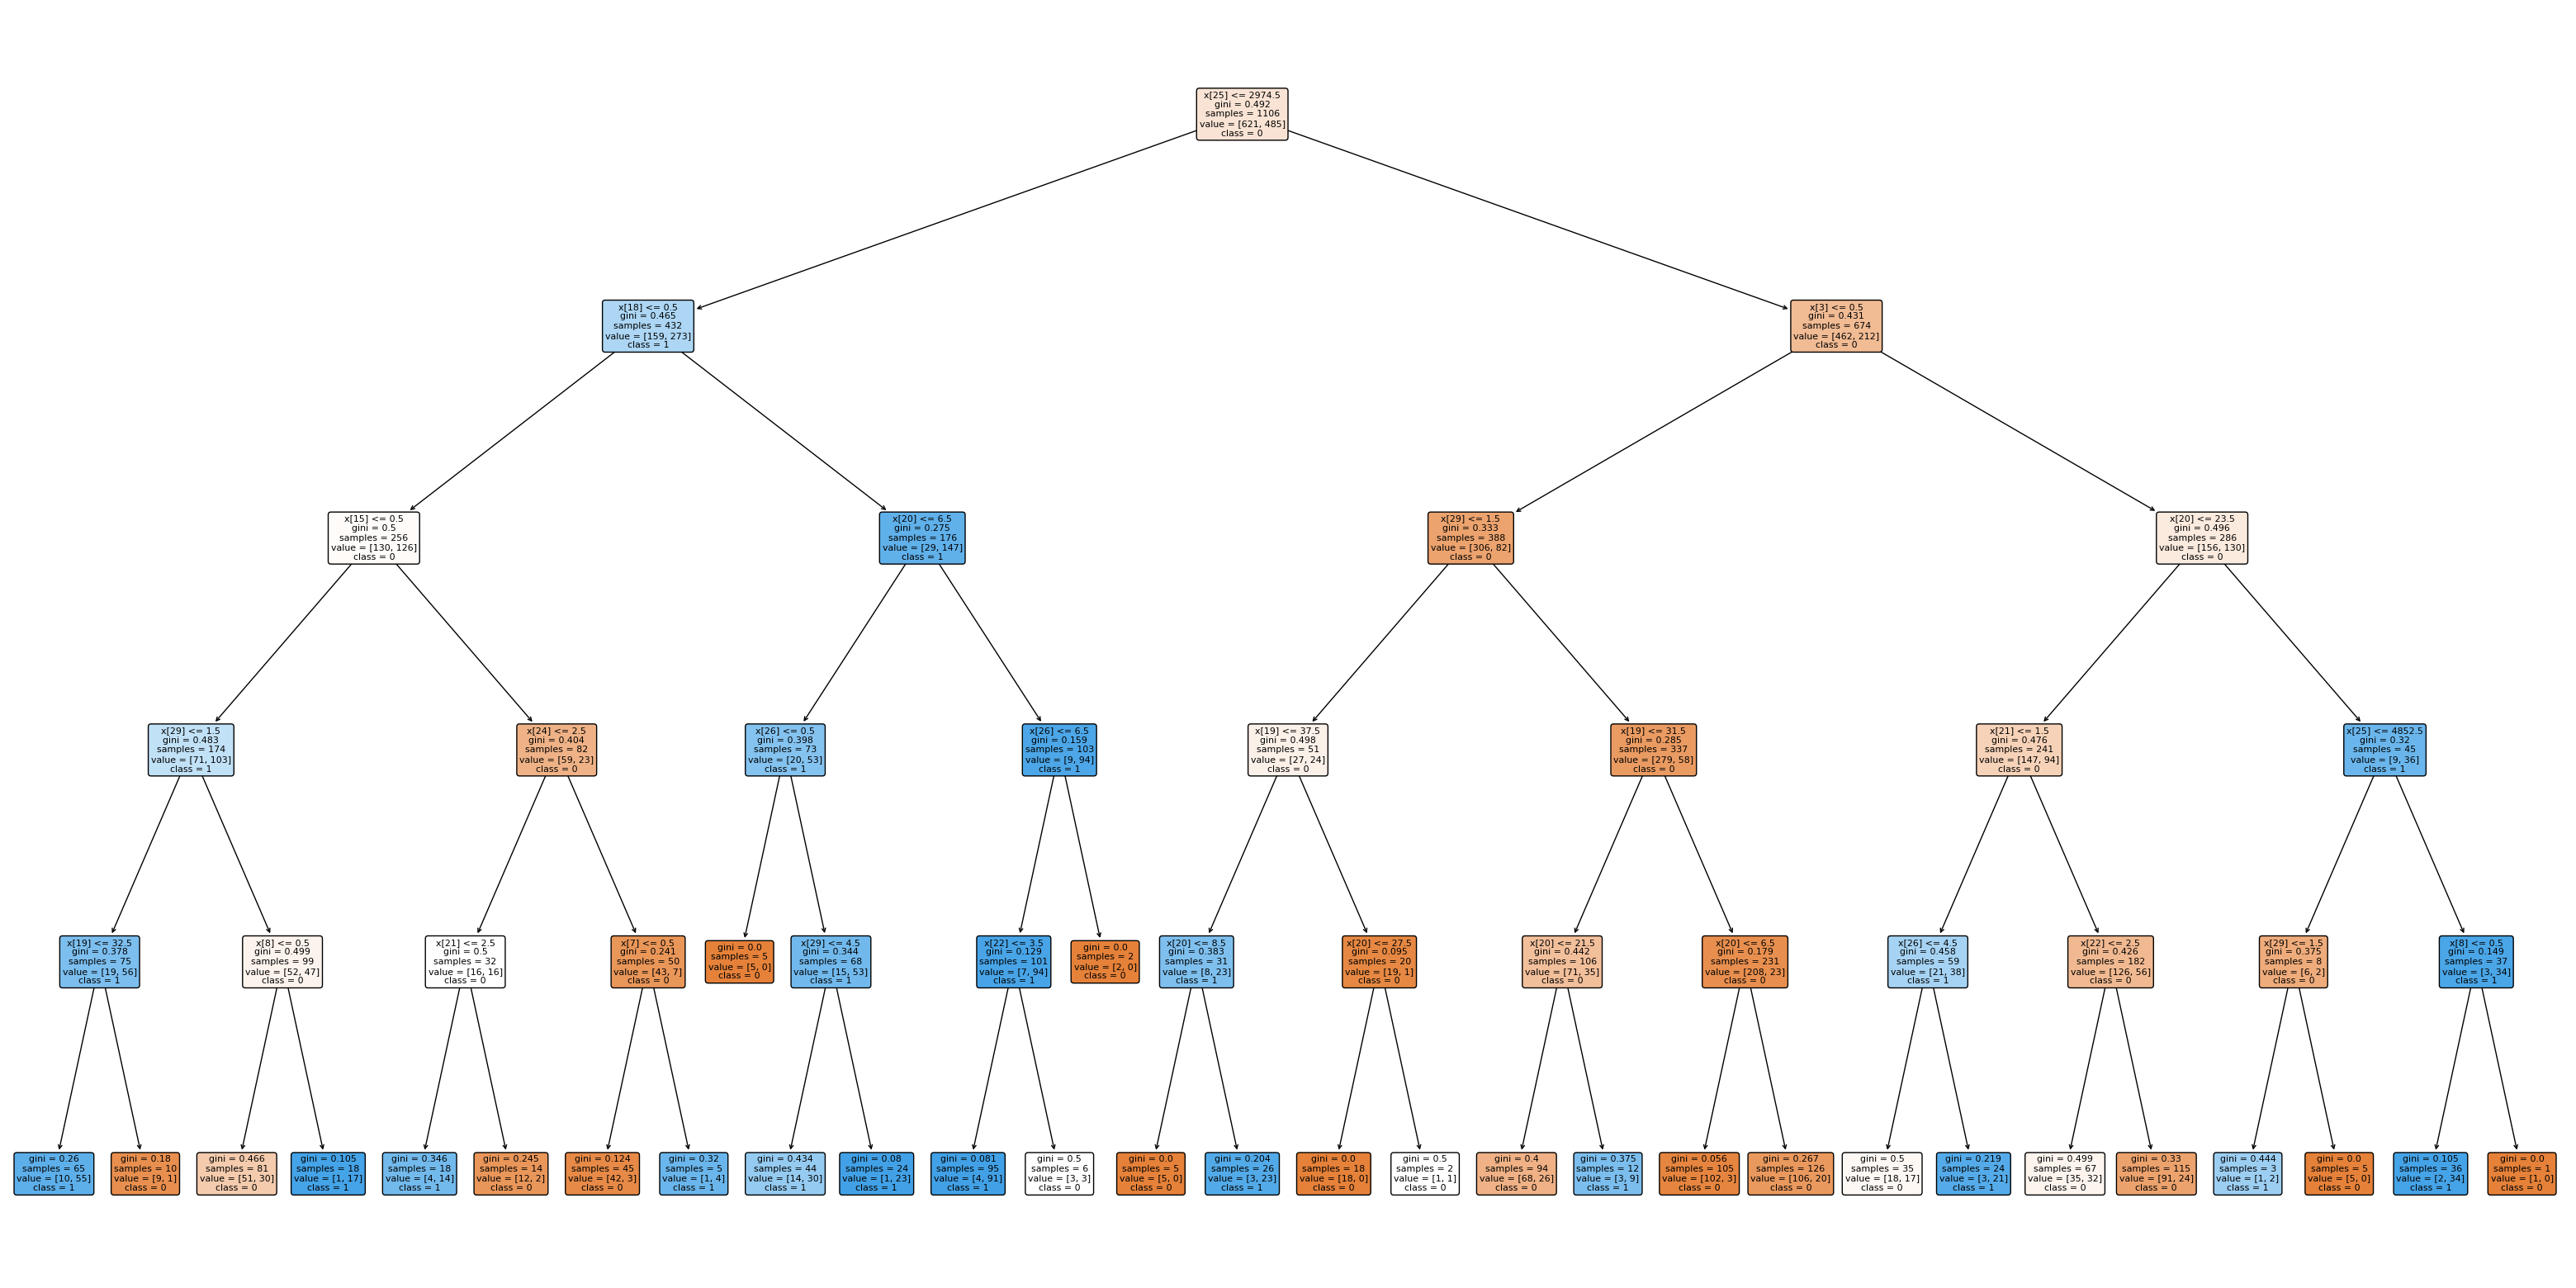

In [221]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train,y_train)
ytest_pred = model.predict(X_test)

       
plt.figure(figsize = (40,20))
tree.plot_tree(model, rounded = True, filled = True,class_names=['0','1'])
plt.show()   

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a Decision Tree model with the predefined parameters and find the average accuracy by performing the 10 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [222]:
# type your code here

In [232]:
dt = DecisionTreeClassifier(random_state=1)

scores = cross_val_score(dt,x,y,cv = 10)

In [234]:
scores.mean()

0.9126582278481014

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. For a decision tree model, find the best value of hyperparameters "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the values as:
        
     criterion = ['entropy', 'gini'],
     max_depth = range(2, 10),
     min_samples_split = range(2,10)

In [235]:
# type your code here

In [237]:
model9 = DecisionTreeClassifier(random_state=1)

In [250]:
tuned_para = [{
     'criterion' : ['entropy', 'gini'],
 'max_depth' : range(2, 10),
 'min_samples_split' : range(2,10)
}]

In [251]:
grid_9 = GridSearchCV(estimator=model9, cv = 5, param_grid = tuned_para)

In [252]:
grid_9_model = grid_9.fit(X_train,y_train)
print(grid_9_model.best_params_)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 3}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>10. Build a decision tree model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [243]:
# type your code here

In [254]:
roc_scores = cross_val_score(model9, x,y,cv = 10,scoring='roc_auc')

In [256]:
roc_scores.mean()

0.9188149350649351

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Build 5 decision trees each with 20 random features. Also predict the attrition for test set for each model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [257]:
# type your code here

In [298]:
scores11 = pd.DataFrame(columns=['sno','score'])
for i in range(5):
    random_numbers = np.random.choice(range(30), 10,replace = False)
    random_10 = x.iloc[:,random_numbers]
    X_train,X_test,y_train,y_test = train_test_split(random_10,y, test_size=0.3,random_state=3)
    model = DecisionTreeClassifier(max_depth=5)
    model.fit(X_train,y_train)
    ytest_pred = model.predict(X_test)
    scores11 = scores11.append(pd.Series({'sno': i, 'score': accuracy_score(y_test, ytest_pred)}), ignore_index=True)
    
    

In [299]:
scores11

,sno,score
0,0.000000,0.710970
1,1.000000,0.763713
2,2.000000,0.654008
3,3.000000,0.672996
4,4.000000,0.654008


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Create a new dataframe "model_predictions_df" by appending each prediction made in question 8. There will be 5 columns in the dataframe for each prediction using the decision tree models built in above question.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [300]:
# type your code here

In [304]:
scores11 = pd.DataFrame(columns=['sno','score'])
model_predictions_df = pd.DataFrame()
for i in range(5):
    random_numbers = np.random.choice(range(30), 10,replace = False)
    random_10 = x.iloc[:,random_numbers]
    X_train,X_test,y_train,y_test = train_test_split(random_10,y, test_size=0.3,random_state=3)
    model = DecisionTreeClassifier(max_depth=5)
    model.fit(X_train,y_train)
    ytest_pred = model.predict(X_test)
    
    scores11 = scores11.append(pd.Series({'sno': i, 'score': accuracy_score(y_test, ytest_pred)}), ignore_index=True)
    model_predictions_df = pd.concat([model_predictions_df, pd.Series(ytest_pred)],axis = 1)    

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a new column "Voted_Result" in the dataframe "model_predictions_df" that contains the maximum occuring value (mode) of the 5 columns in the dataframe (row-wise).<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [311]:
# type your code here

In [319]:
model_predictions_df['Voted_Result'] = model_predictions_df.mode(axis =1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Consider the values of "Voted_Result" as our new predictions and store its values in a variable "new_y_pred" and find the accuracy and the roc-auc score using new_y_pred.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [320]:
# type your code here

In [322]:
accuracy_score(y_test, model_predictions_df['Voted_Result'])

0.7172995780590717